In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0, 1, -1]])
    for i in range(len(data)):
        if data[i, -1] == 0:
            data[i, -1] = -1
    # print(data)
    return data[:, :2], data[:, -1]

In [10]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:
lina_options = '-t 0 -c 1 -b 1'      #线性核
guass_options = '-t 2 -c 4 -b 1'     # 高斯核
lina_model = svm_train(y_train,X_train,lina_options)
svm_save_model('./static/xiGua3.3alpha_linear',lina_model)
guass_model = svm_train(y_train,X_train,guass_options)
svm_save_model('./static/xiGua3.3alpha_Guass',guass_model)

In [14]:
lina_p_label, lina_p_acc, lina_p_val = svm_predict(y_test, X_test, lina_model)
guass_p_label, guass_p_acc, guass_p_val = svm_predict(y_test, X_test, guass_model)

Model supports probability estimates, but disabled in predicton.
Accuracy = 100% (25/25) (classification)
Model supports probability estimates, but disabled in predicton.
Accuracy = 100% (25/25) (classification)


In [18]:
print(lina_p_label - y_test)
print(guass_p_label)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[-1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0]


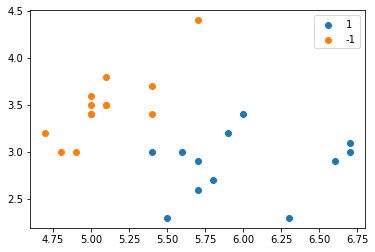

In [28]:
plt.scatter(X_test[np.argwhere(y_test == 1),0],X_test[np.argwhere(y_test == 1),1], label='1')
plt.scatter(X_test[np.argwhere(y_test == -1),0],X_test[np.argwhere(y_test == -1),1], label='-1')
plt.legend()